In [72]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
import numpy as np
import pandas as pd

In [37]:
# Data Input as Data Frame
data = pd.read_csv("/home/prasun/GitDemo/CRO_IIITL_Test/mushroom/agaricus-lepiota.data")
data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [38]:
# Primary Exploration
data.shape

(8123, 23)

In [39]:
cols = [
    'class','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
    'stalk-surface-below-ring', 'stalk-color-above-ring', 
    'stalk-color-below-ring', 'veil-type', 'veil-color', 
    'ring-number', 'ring-type', 'spore-print-color', 'population', 
    'habitat'
]
cols

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [40]:
data.columns = cols
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [41]:
# Setting aside the target column
y = data["class"]


In [42]:
#Treating the labels
y1 = y.apply(lambda x: 1 if x=="e" else 0).values #Labelled poisonous as 0, edible as 1
np.unique(y1)

array([0, 1])

In [43]:
# Setting aside the feature columns
X = data.drop(["class"],axis= "columns")
X.shape

(8123, 22)

In [44]:
# Treating Missing Values on Attribute 11 (stalk-root)
X.loc[X["stalk-root"] == "?"]
X["stalk-root"].value_counts()

stalk-root
b    3776
?    2480
e    1119
c     556
r     192
Name: count, dtype: int64

In [45]:
# Percentage of Missing Value
print(f"{round((2480/8123)*100,2)} %")

30.53 %


In [46]:
# Removing Specific Rows
X.drop(X.loc[X["stalk-root"] == "?"].index)
X.loc[X["stalk-root"]!= "?"]
X2 = X[X["stalk-root"] != "?"] # Rows having missing values deleted
y2 = y[X.loc[X["stalk-root"] != "?"].index] # Rows having missing values deleted

In [47]:
# Including Label Encoder
from sklearn.preprocessing import OneHotEncoder

hot1 = OneHotEncoder()
hot2 = OneHotEncoder()

X1 = hot1.fit_transform(X).toarray()  # Missing Values not treated
X3 = hot2.fit_transform(X2).toarray() # Treated DataFrame

In [48]:
y2.shape,X2.shape

((5643,), (5643, 22))

In [49]:
# Splitting Train-Test Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2)
Xt_train,Xt_test,yt_train,yt_test = train_test_split(X3,y2,test_size=0.2)

In [50]:
# Primary Model Training
from sklearn.linear_model import LogisticRegression
lreg1 = LogisticRegression()
lreg2 = LogisticRegression()

lreg1.fit(X_train,y_train)
lreg2.fit(Xt_train,yt_train) # Treated Model

LogisticRegression()

<Axes: >

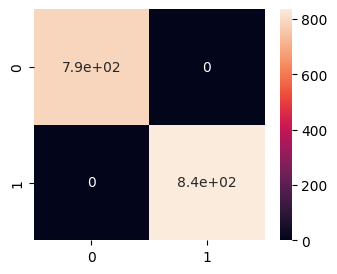

In [51]:
# Visualizing Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix

y_pred = lreg1.predict(X_test)
yt_pred = lreg2.predict(Xt_test)

cm1 = confusion_matrix(y_pred,y_test)
cm2 = confusion_matrix(yt_pred,yt_test)

plt.figure(figsize= (4,3))
sns.heatmap(data=cm1, annot= True,square=True)

<Axes: >

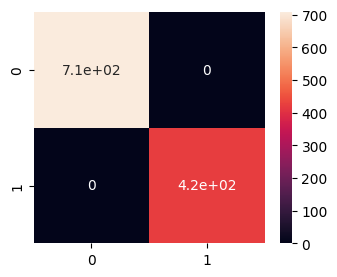

In [52]:
plt.figure(figsize= (4,3))
sns.heatmap(data=cm2, annot= True,square=True)

In [53]:
a = lreg1.score(X_test,y_test)
b = lreg2.score(Xt_test,yt_test)
print(f"Model Score: {a}, Treated Model Score: {b}")

Model Score: 1.0, Treated Model Score: 1.0


In [54]:
from sklearn.ensemble import RandomForestClassifier
ranc = RandomForestClassifier()
ranc.fit(Xt_train,yt_train)

RandomForestClassifier()

In [55]:
#Cross Validation Score and the Dilemma
from sklearn.model_selection import cross_val_score
sc1= cross_val_score(lreg1, X_test,y_test,cv = 10)
sc2= cross_val_score(lreg2, Xt_test,yt_test,cv = 10)
sc3= cross_val_score(ranc, Xt_test,yt_test,cv = 10)
print(f"Score1: {np.mean(sc1)}, Score2:{np.mean(sc2)}, Score3:{np.mean(sc3)}")

Score1: 0.9981557221843522, Score2:0.9991150442477876, Score3:0.9991150442477876


In [59]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

In [57]:
from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(estimator=lreg1,param_grid={"solver":['lbfgs', 'liblinear','newton-cholesky']},cv=10)
gsv.fit(Xt_train,yt_train)
print(gsv.best_params_)
print(f"Score:{gsv.best_score_}")
result = pd.DataFrame(gsv.cv_results_)
result[["mean_fit_time","param_solver","mean_test_score"]]


{'solver': 'lbfgs'}
Score:1.0


,mean_fit_time,param_solver,mean_test_score
0,0.042307,lbfgs,1.0
1,0.042576,liblinear,1.0
2,0.072534,newton-cholesky,1.0


In [68]:
model_param ={
    'logit':{
        'model': LogisticRegression(),
        'param':{
            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']
        }
    },
    'svc':{
        'model': SVC(),
        'param':{
            'C':[10,20,30,40,50],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
        }

    },
    'rnf':{
        'model': RandomForestClassifier(),
        'param': {
            'n_estimators': list(range(10,100,10)),
            'criterion':['gini', 'entropy', 'log_loss']
        }

    },
    'mnb':{
        'model': MultinomialNB(),
        'param':{
            
        }

    }
}

In [73]:
from sklearn.model_selection import RandomizedSearchCV
score = []
for (key,val) in model_param.items():
    ran = RandomizedSearchCV(
        estimator= val['model'],
        param_distributions= val["param"],
        n_iter= 10
    )
    ran.fit(Xt_train,yt_train)
    score.append({"Model":[key], "Parameter":[ran.best_params_],"Score": [ran.best_score_]})

In [74]:
score

[{'Model': ['logit'], 'Parameter': [{'solver': 'lbfgs'}], 'Score': [1.0]},
 {'Model': ['svc'],
  'Parameter': [{'kernel': 'linear', 'C': 30}],
  'Score': [1.0]},
 {'Model': ['rnf'],
  'Parameter': [{'n_estimators': 60, 'criterion': 'entropy'}],
  'Score': [1.0]},
 {'Model': ['mnb'], 'Parameter': [{}], 'Score': [0.9678779530169207]}]

In [75]:
df = pd.DataFrame(data= score, columns= ['Model', 'Parameter', 'Score'])
df #Hence Going Ahead with Logistic Regression

,Model,Parameter,Score
0,[logit],[{'solver': 'lbfgs'}],[1.0]
1,[svc],"[{'kernel': 'linear', 'C': 30}]",[1.0]
2,[rnf],"[{'n_estimators': 60, 'criterion': 'entropy'}]",[1.0]
3,[mnb],[{}],[0.9678779530169207]
